In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split

### Unione tabelle

In [3]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,7.5
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,5.9
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,5.7
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,5.7
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,8.0


# Simple Regression

### Reviews - numVotes

#### Reg

In [4]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
X = df_train[['ReviewsTotal']]
y = df_train['numVotes']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Coefficients: 
 [1.20147034]
Intercept: 
 3.0172327070532434


In [6]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.666
MSE: 1.030
MAE: 0.796


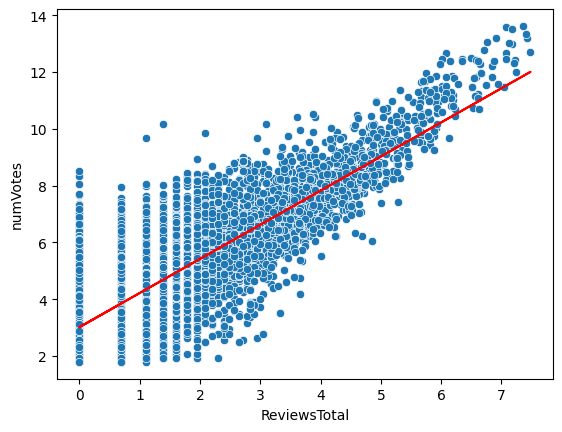

In [7]:
sns.scatterplot(data=df_train, x="ReviewsTotal", y="numVotes")
plt.plot(X, model.coef_[0]*X+model.intercept_, c="red")

#### DecisionTree

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (solo max_depth)
param_dist = {
    'max_depth': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 5}
Best R2:  0.6596863925373329
Best MSE:  1.0056788214202235
Best MAE:  0.7887139168044504


In [10]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: 0.668
MSE: 1.025
MAE: 0.796


array([4.9151127 , 5.80041757, 3.77941604, ..., 3.0564699 , 3.0564699 ,
       3.0564699 ])

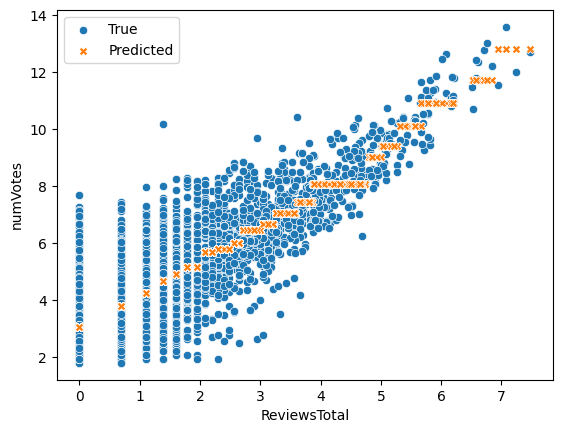

In [11]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=0.450, MSE=1.697, MAE=0.964
k=2: R2=0.526, MSE=1.465, MAE=0.907
k=3: R2=0.565, MSE=1.342, MAE=0.873
k=4: R2=0.588, MSE=1.274, MAE=0.846
k=5: R2=0.599, MSE=1.238, MAE=0.832
k=6: R2=0.637, MSE=1.121, MAE=0.806
k=7: R2=0.631, MSE=1.140, MAE=0.811
k=8: R2=0.655, MSE=1.066, MAE=0.806
k=9: R2=0.657, MSE=1.058, MAE=0.802
k=10: R2=0.661, MSE=1.046, MAE=0.801
k=11: R2=0.661, MSE=1.047, MAE=0.801
k=12: R2=0.662, MSE=1.043, MAE=0.802
k=13: R2=0.664, MSE=1.038, MAE=0.795
k=14: R2=0.663, MSE=1.039, MAE=0.794
k=15: R2=0.665, MSE=1.034, MAE=0.793
k=16: R2=0.667, MSE=1.030, MAE=0.795
k=17: R2=0.667, MSE=1.030, MAE=0.792
k=18: R2=0.666, MSE=1.030, MAE=0.791
k=19: R2=0.666, MSE=1.030, MAE=0.794
k=20: R2=0.666, MSE=1.031, MAE=0.791
k=21: R2=0.667, MSE=1.028, MAE=0.798
k=22: R2=0.667, MSE=1.030, MAE=0.801
k=23: R2=0.665, MSE=1.036, MAE=0.808
k=24: R2=0.664, MSE=1.037, MAE=0.808
k=25: R2=0.664, MSE=1.039, MAE=0.811
k=26: R2=0.664, MSE=1.037, MAE=0.808
k=27: R2=0.665, MSE=1.036, MAE=0.806
k=28: R2=0

In [14]:
reg = KNeighborsRegressor(n_neighbors=81)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.667
MSE: 1.028
MAE: 0.804


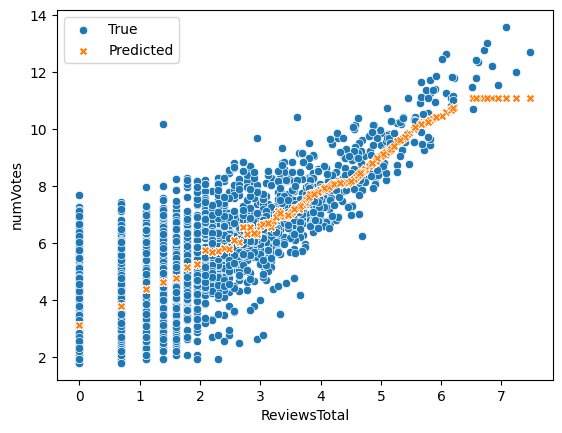

In [15]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

### ReviewsTotal - ratingMean

#### Reg

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [17]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
X = df_train[['ReviewsTotal']]
y = df_train['averageRating']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Coefficients: 
 [-0.128786]
Intercept: 
 6.940099932670109


In [18]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.018
MSE: 1.575
MAE: 0.973


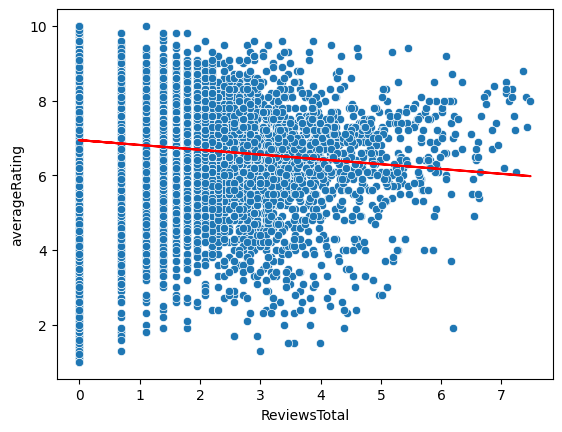

In [19]:
sns.scatterplot(data=df_train, x="ReviewsTotal", y="averageRating")
plt.plot(X, model.coef_[0]*X+model.intercept_, c="red")

#### DecisionTree

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (solo max_depth)
param_dist = {
    'max_depth': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 6}
Best R2:  0.01739182965196808
Best MSE:  1.609657998845546
Best MAE:  0.9743413255696328


In [22]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: -0.005
MSE: 1.611
MAE: 0.980


array([6.94059406, 6.85879682, 6.81355932, ..., 6.66296296, 6.81355932,
       6.94059406])

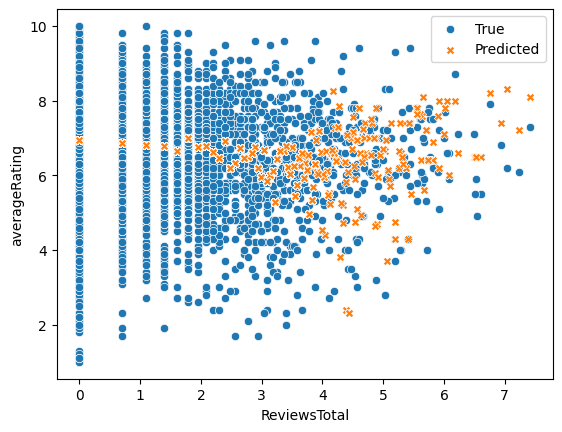

In [23]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="averageRating", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=-1.359, MSE=3.784, MAE=1.649
k=2: R2=-0.591, MSE=2.552, MAE=1.315
k=3: R2=-0.270, MSE=2.037, MAE=1.149
k=4: R2=-0.132, MSE=1.816, MAE=1.078
k=5: R2=-0.186, MSE=1.903, MAE=1.124
k=6: R2=-0.169, MSE=1.874, MAE=1.115
k=7: R2=-0.164, MSE=1.867, MAE=1.117
k=8: R2=-0.109, MSE=1.778, MAE=1.077
k=9: R2=-0.044, MSE=1.674, MAE=1.030
k=10: R2=-0.012, MSE=1.623, MAE=1.000
k=11: R2=-0.019, MSE=1.634, MAE=1.013
k=12: R2=-0.024, MSE=1.642, MAE=1.019
k=13: R2=-0.020, MSE=1.635, MAE=1.017
k=14: R2=-0.001, MSE=1.606, MAE=0.997
k=15: R2=0.007, MSE=1.593, MAE=0.986
k=16: R2=0.009, MSE=1.590, MAE=0.984
k=17: R2=-0.007, MSE=1.615, MAE=1.006
k=18: R2=-0.028, MSE=1.648, MAE=1.027
k=19: R2=-0.015, MSE=1.629, MAE=1.015
k=20: R2=-0.031, MSE=1.653, MAE=1.028
k=21: R2=-0.020, MSE=1.636, MAE=1.019
k=22: R2=-0.014, MSE=1.626, MAE=1.012
k=23: R2=-0.011, MSE=1.622, MAE=1.009
k=24: R2=-0.019, MSE=1.634, MAE=1.017
k=25: R2=-0.001, MSE=1.605, MAE=0.999
k=26: R2=0.000, MSE=1.603, MAE=0.996
k=27: R2=0.005, MSE=1.59

In [26]:
reg = KNeighborsRegressor(n_neighbors=127)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.012
MSE: 1.585
MAE: 0.986


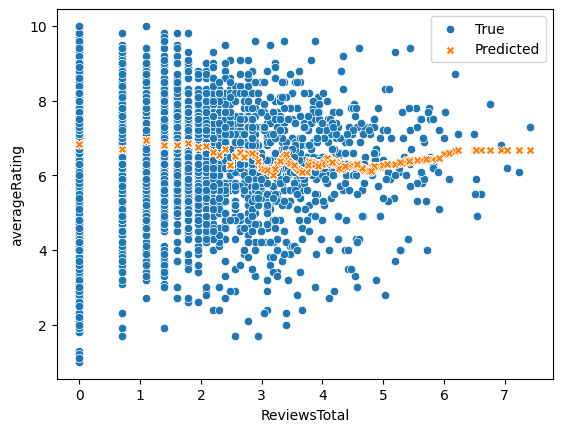

In [27]:
# Crea un nuovo DataFrame con le previsioni
df_test = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test, x="ReviewsTotal", y="averageRating", label="True")
sns.scatterplot(data=df_test, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression

In [28]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,7.5
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,5.9
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,5.7
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,5.7
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,8.0


In [29]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [30]:
df_train

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,AwNmExWins,numRegions,ReviewsTotal,averageRating
0,1995,40,0.000000,6.659294,0.693147,0.000000,21,0.000000,1,0.693147,7.5
1,1982,28,0.000000,2.484907,0.693147,0.000000,1,0.000000,1,0.000000,5.9
2,1992,92,0.000000,3.663562,0.693147,0.000000,24,0.000000,1,0.693147,5.7
3,2021,53,0.000000,2.772589,3.135494,0.000000,56,0.000000,1,0.000000,5.7
4,2020,80,0.693147,9.662625,5.852202,1.098612,47,0.693147,32,6.124683,8.0
...,...,...,...,...,...,...,...,...,...,...,...
19419,1942,92,0.000000,4.304065,1.609438,0.000000,45,0.000000,14,1.791759,5.8
19420,1990,92,0.000000,2.772589,1.098612,0.000000,22,0.000000,1,0.693147,4.4
19421,2021,140,0.000000,7.848153,3.688879,1.386294,129,1.791759,5,3.912023,5.5
19422,1982,92,0.000000,8.010360,3.970292,0.693147,53,0.000000,26,4.736198,3.3


#### Reg

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [32]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X = df_train.drop(columns='ReviewsTotal')
y = df_train['ReviewsTotal']

# Dividiamo i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.round(2))

          feature    VIF
0       startYear  43.21
1  runtimeMinutes   3.88
2       awardWins   2.04
3        numVotes  12.55
4     totalImages   3.46
5     totalVideos   1.57
6    totalCredits   2.13
7      AwNmExWins   2.32
8      numRegions   2.57
9   averageRating  32.01


In [34]:
del df_train['startYear']
# del df_train['numVotes']
del df_train['averageRating']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] =df_train.columns
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(len(df_train.columns))]

print(vif_data)

          feature       VIF
0  runtimeMinutes  3.197618
1       awardWins  2.035983
2        numVotes  7.295446
3     totalImages  3.508333
4     totalVideos  1.587102
5    totalCredits  2.120557
6      AwNmExWins  2.318127
7      numRegions  2.735199
8    ReviewsTotal  3.803728


In [36]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

Coefficients: 
 [-3.634400e-03  1.700100e-03  6.574080e-02  4.102772e-01  7.853540e-02
  3.608409e-01 -3.056000e-04  1.020687e-01  3.606960e-02 -4.719950e-02]
Intercept: 
 6.388644736030002


runtimeMinutes: -0.003829  
awardWins: 0.001493  
numVotes: 0.056921  
totalImages: 0.411791  
totalVideos: 0.069732  
totalCredits: 0.395141  
AwNmExWins: -0.000233  
numRegions: 0.102147  
ReviewsTotal: 0.036063  

Vengono eliminate in contemporanea e cosi che numvotes arriva a un vif accettabili e la bonta del modello resta buona

In [37]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.742
MSE: 0.367
MAE: 0.461


#### Decision Tree

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [40]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.629
MSE: 0.528
MAE: 0.433


#### K-nn

In [41]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [42]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.577
MSE: 0.602
MAE: 0.514
